In [1]:
# imports
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

from basic_utils import *
from valuation import *

Loading config.json
Loading file quote/csv/2019-02-15
Loading file summary-categories/assetProfile
Loading file summary-categories/defaultKeyStatistics/2019-02-15
Loading file summary-categories/financialData/2019-02-15
Loading file summary-categories/financials-BS
Loading file summary-categories/financials-IS


/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Loading file summary-categories/financials-CF


### Single company valuation using function

In [2]:
waterfall, val_df = value_equity('BABA')
waterfall

/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


{'symbol': 'BABA',
 'storeDate': 1550390400.0,
 'baseRate': 0.026660000000000003,
 'equityRiskPremium': 0.05,
 'projFedFundsIncr': 0.005,
 'discountRate': 0.08166000000000001,
 'baseMult': 12.25,
 'growthRate': 0.40484053480411475,
 'growthMult': 24.39521604412344,
 'ROA': 0.15063968649973725,
 'ROE': 0.26783469744477406,
 'AT': 0.3680942014130213,
 'AAT': 0.6472352729865041,
 'steadyCF': 1452494750000.0,
 'totalReinvCapital': 107578000000.0,
 'projCashROE': 28813121081.713905,
 'npvGrowthCF': 702902313693.8984,
 'npvSteadyCF': 214615279481.0798,
 'netDebt': 46569984781.09901,
 'npvGrowth': 103858259385.3187,
 'equityValue': 365043523647.4975,
 'currentValue': 430509260800.0,
 'premDisc': 1.1793367993448343}

### Full universe loop

In [440]:
eqty_symbols = latest_quotes[latest_quotes.quoteType == 'EQUITY'].symbol.unique().tolist()
excl_list = ['TSM'] # one-time exclude because missing 
eqty_symbols = [x for x in eqty_symbols if x not in excl_list]

In [503]:
# full loop value each company
waterfalls = pd.DataFrame() # key assumptions
val_sheets = pd.DataFrame() # valuation datasets for each co

for symbol in eqty_symbols:
    print('Intrinsic value for {}'.format(symbol))
    waterfall, val_df = value_equity(symbol)
    val_sheets = val_sheets.append(val_df)
    waterfalls = waterfalls.append(waterfall, ignore_index=True)
waterfalls.set_index('symbol', inplace=True)

# save the results to S3
csv_store(waterfalls, 'valuation/waterfall/', csv_ext.format(str(today_date)))
csv_store(val_sheets, 'valuation/backup/', csv_ext.format(str(today_date)))

Intrinsic value for 0700.HK


/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Intrinsic value for 1810.HK
Intrinsic value for 3690.HK
Intrinsic value for 9984.T
Intrinsic value for A


/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Intrinsic value for AAPL
Intrinsic value for ABBV
Intrinsic value for ABC
Intrinsic value for ABT
Intrinsic value for ADBE
Intrinsic value for ADI
Intrinsic value for ADSK
Intrinsic value for AEIS
Intrinsic value for AEO
Intrinsic value for AGN
Intrinsic value for AKAM
Intrinsic value for ALGN
Intrinsic value for ALLO


/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1019: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Intrinsic value for ALRM
Intrinsic value for ALXN
Intrinsic value for AMAT
Intrinsic value for AMD
Intrinsic value for AMGN
Intrinsic value for AMZN
Intrinsic value for ANET
Intrinsic value for ANSS
Intrinsic value for ANTM
Intrinsic value for APH
Intrinsic value for APTV
Intrinsic value for ATHN
Intrinsic value for ATVI
Intrinsic value for AVGO
Intrinsic value for AVX
Intrinsic value for AYX
Intrinsic value for BABA
Intrinsic value for BAX
Intrinsic value for BBY
Intrinsic value for BC
Intrinsic value for BDX
Intrinsic value for BGNE
Intrinsic value for BIDU
Intrinsic value for BIIB
Intrinsic value for BKNG
Intrinsic value for BL
Intrinsic value for BLUE
Intrinsic value for BMY
Intrinsic value for BOX
Intrinsic value for BRKR
Intrinsic value for BRKS
Intrinsic value for BSX
Intrinsic value for BWA
Intrinsic value for CAH
Intrinsic value for CBM
Intrinsic value for CCL
Intrinsic value for CCMP
Intrinsic value for CDNS
Intrinsic value for CELG
Intrinsic value for CERN
Intrinsic value fo

In [510]:
show = ['symbol', 'sector', 'industry', 'premDisc']
mask = (waterfalls.premDisc > 0.5) & (waterfalls.premDisc < 0.9)
# waterfalls[mask][show].sort_values(by='premDisc')
val_pro_join = profile.join(waterfalls[mask], on='symbol', how='right', lsuffix='l_')
val_pro_join[show].sort_values(by=['sector', 'industry'])

,symbol,sector,industry,premDisc
123,GPS,Consumer Cyclical,Apparel Stores,0.868393
280,TM,Consumer Cyclical,Auto Manufacturers,0.521518
203,NCLH,Consumer Cyclical,Leisure,0.812649
160,JD,Consumer Cyclical,Specialty Retail,0.708873
104,EXEL,Healthcare,Biotechnology,0.768923
209,NKTR,Healthcare,Biotechnology,0.581749
65,CNC,Healthcare,Health Care Plans,0.881086
133,HPQ,Technology,Computer Systems,0.696601
4,AAPL,Technology,Consumer Electronics,0.808809
266,STX,Technology,Data Storage,0.860319


### Single company analysis

In [6]:
symbol = 'AAPL'
waterfall = {}
waterfall['symbol'] = symbol
waterfall['storeDate'] = datetime.today()

In [7]:
key_stats_df = latest_keystats[latest_keystats.symbol == symbol]
fin_stats_df = latest_finstats[latest_finstats.symbol == symbol]
quote_df = latest_quotes[latest_quotes.symbol == symbol]

In [8]:
# PENDING: need to add symbol and storeDate so we can save as an aggregate dataset
bs_sum = get_BS_metrics(symbol)
cf_sum = get_CF_metrics(symbol)
is_sum = get_IS_metrics(symbol, cf_sum)
val_df = get_val_summary(bs_sum, cf_sum, is_sum)

In [9]:
(val_df[key_cols[:-4]] / UNIT_SCALE).T.round(1)

endDate,2016-09-23,2017-09-29,2018-09-28,2018-12-28
totalAssets,321.7,375.3,365.7,373.7
adjAssetBaseLessCash,157.2,206.4,228.2,229.1
netDebt,-158.7,-165.2,-134.6,-142.3
totalRevenue,215.6,229.2,265.6,261.6
steadyCF,55.7,54.1,66.5,64.3
steadyFCF,55.7,54.1,66.5,57.7
reinvCapital,NaN,4.9,6.5,3.4


In [10]:
(val_df[val_df.columns[-4:]]).T.round(2)

endDate,2016-09-23,2017-09-29,2018-09-28,2018-12-28
ROA,0.17,0.16,0.18,0.17
ROE,0.35,0.30,0.31,0.25
AT,0.67,0.66,0.72,0.71
AAT,1.37,1.26,1.22,1.14


In [13]:
# historical growth rates
growth_rate = max(cagr_series(val_df[growth_cols]).median(), 0)
ROIC_stats = val_df[['ROA', 'ROE','AT', 'AAT']].mean()
ROE = ROIC_stats.ROE
waterfall.update(ROIC_stats.to_dict())

# Calculate valuation multiples
mult = round( 1 / discount_rate, 2)
gr_mult = mult + (growth_rate * growth_cap_factor * 100)

# save assumptions during daily computations
names = ['baseRate', 'equityRiskPremium', 'projFedFundsIncr', 'discountRate', 'baseMult', 'growthRate', 'growthMult']
values = [base_rate, risk_premium, proj_increase, discount_rate, mult, growth_rate, gr_mult]
waterfall.update({x: y for x, y in zip(names, values)})

In [14]:
# calculate intrinsic value of equity
steadyCF = val_df.steadyCF[-1]
npv_CF = steadyCF * mult
totalreinvCapital = val_df.reinvCapital.sum()
projCashROE = totalreinvCapital * ROE
npv_GR = projCashROE * gr_mult if val_df.reinvCapital.sum() > 0 else 0
names = ['steadyCF', 'totalReinvCapital', 'projCashROE', 'npvGrowthCF']
values = [npv_CF, totalreinvCapital, projCashROE, npv_GR]
waterfall.update({x: y for x, y in zip(names, values)})

In [16]:
# FX calcs
curr = fin_stats_df.iloc[0].financialCurrency
FX = 1 if curr == 'USD' else get_FX(FXs, curr)

In [18]:
# given dual class shares we equity value only, not value per share (manual)
values = [x * FX for x in [npv_CF, -val_df.netDebt[-1], npv_GR]]
equityVal = sum(values)
values.append(equityVal)
currentVal = quote_df.iloc[0].marketCap
prem_disc = currentVal / equityVal
values.append(currentVal)
values.append(prem_disc)
names = ['npvSteadyCF', 'netDebt', 'npvGrowth', 'equityValue', 'currentValue', 'premDisc']
waterfall.update({x: y for x, y in zip(names, values)})

In [19]:
print_fmt = 'Current Value: {}, Calculated Value: {}, Prem/Disc. {}'
print(print_fmt.format(
    round(currentVal / UNIT_SCALE, 1), 
    round(equityVal / UNIT_SCALE, 1),
    round(prem_disc, 2)))

Current Value: 803.1, Calculated Value: 992.9, Prem/Disc. 0.81


In [20]:
waterfall

{'symbol': 'AAPL',
 'storeDate': datetime.datetime(2019, 2, 17, 20, 1, 11, 21195),
 'ROA': 0.17044749282556537,
 'ROE': 0.3026702440757734,
 'AT': 0.6881281905966559,
 'AAT': 1.2498318700260715,
 'steadyCF': 787405500000.0,
 'totalReinvCapital': 14758000000.0,
 'projCashROE': 4466807462.070264,
 'npvGrowthCF': 63211562011.39118,
 'baseRate': 0.026660000000000003,
 'equityRiskPremium': 0.05,
 'projFedFundsIncr': 0.005,
 'discountRate': 0.08166000000000001,
 'baseMult': 12.25,
 'growthRate': 0.06337987233723341,
 'growthMult': 14.151396170117003,
 'npvSteadyCF': 787405500000.0,
 'netDebt': 142274000000.0,
 'npvGrowth': 63211562011.39118,
 'equityValue': 992891062011.3912,
 'currentValue': 803059335168.0,
 'premDisc': 0.8088091089682774}

### Other analysis

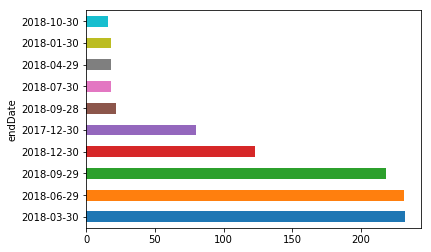

In [110]:
# show distribution of filling dates for the universe
field = 'cash'
fil_period = latest_finBS[(latest_finBS.period == 'Q')]
date_count_df = fil_period.groupby(
    fil_period.index).count().sort_values(
        by=field, ascending=False).head(10)
date_count_df[field].plot.barh();